<a href="https://colab.research.google.com/github/Ahiru8B/ml-hw/blob/main/10_text_analysis_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Частотный анализ русского текста и построение облака слов

## Загрузка и отображение данных

In [1]:
f = open('/content/The_Master_and_Margarita.txt', "r", encoding='utf-8')
text = f.read()

In [2]:
type(text)

str

In [3]:
len(text)

750512

In [4]:
text[:300]

'Мастер и Маргарита\n\nЧАСТЬ ПЕРВАЯ\n\n…Так кто ж ты, наконец?\n– Я – часть той силы,\nчто вечно хочет\nзла и вечно совершает благо.\n\n\nГете. «Фауст»\n\nГлава 1\nНикогда не разговаривайте с неизвестными\n\nОднажды весною, в час небывало жаркого заката, в Москве, на Патриарших прудах, появились два гражданина. Пер'

## Предварительная обработка текста

In [5]:
# перевод в единый регистр (например, нижний)
text = text.lower()

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
type(string.punctuation)

str

In [8]:
spec_chars = string.punctuation + '\n\xa0«»\t—…'

In [9]:
text = text.replace('\xa0\xa0\xa0\xa0',' ')

In [10]:
%%time
text = "".join([ch for ch in text if ch not in spec_chars])

CPU times: user 69.2 ms, sys: 15.9 ms, total: 85.1 ms
Wall time: 85.5 ms


In [11]:
text[:300]

'мастер и маргаритачасть перваятак кто ж ты наконец– я – часть той силычто вечно хочетзла и вечно совершает благогете фаустглава 1никогда не разговаривайте с неизвестнымиоднажды весною в час небывало жаркого заката в москве на патриарших прудах появились два гражданина первый из них одетый в летнюю с'

In [12]:
import re
text = re.sub('\n', '', text)

In [13]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [14]:
%%time
text = remove_chars_from_text(text, spec_chars)

CPU times: user 68.5 ms, sys: 6.79 ms, total: 75.3 ms
Wall time: 76 ms


In [15]:
%%time
text = remove_chars_from_text(text, string.digits)

CPU times: user 48 ms, sys: 11 ms, total: 59 ms
Wall time: 59.9 ms


In [36]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Токенизация текста

In [17]:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [18]:
print(type(text_tokens), len(text_tokens))
text_tokens[:100]

<class 'list'> 114057


['мастер',
 'и',
 'маргаритачасть',
 'перваятак',
 'кто',
 'ж',
 'ты',
 'наконец–',
 'я',
 '–',
 'часть',
 'той',
 'силычто',
 'вечно',
 'хочетзла',
 'и',
 'вечно',
 'совершает',
 'благогете',
 'фаустглава',
 'никогда',
 'не',
 'разговаривайте',
 'с',
 'неизвестнымиоднажды',
 'весною',
 'в',
 'час',
 'небывало',
 'жаркого',
 'заката',
 'в',
 'москве',
 'на',
 'патриарших',
 'прудах',
 'появились',
 'два',
 'гражданина',
 'первый',
 'из',
 'них',
 'одетый',
 'в',
 'летнюю',
 'серенькую',
 'пару',
 'был',
 'маленького',
 'роста',
 'упитан',
 'лыс',
 'свою',
 'приличную',
 'шляпу',
 'пирожком',
 'нес',
 'в',
 'руке',
 'а',
 'на',
 'хорошо',
 'выбритом',
 'лице',
 'его',
 'помещались',
 'сверхъестественных',
 'размеров',
 'очки',
 'в',
 'черной',
 'роговой',
 'оправе',
 'второй',
 '–',
 'плечистый',
 'рыжеватый',
 'вихрастый',
 'молодой',
 'человек',
 'в',
 'заломленной',
 'на',
 'затылок',
 'клетчатой',
 'кепке',
 '–',
 'был',
 'в',
 'ковбойке',
 'жеваных',
 'белых',
 'брюках',
 'и',
 'в'

In [19]:
import nltk
text = nltk.Text(text_tokens)
print(type(text))
text[:10]

<class 'nltk.text.Text'>


['мастер',
 'и',
 'маргаритачасть',
 'перваятак',
 'кто',
 'ж',
 'ты',
 'наконец–',
 'я',
 '–']

## Расчёт частоты встречаемости слов

In [20]:
%%time
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist

CPU times: user 61 ms, sys: 2.93 ms, total: 64 ms
Wall time: 64.1 ms


FreqDist({'и': 4926, 'в': 3570, '–': 3200, 'не': 2015, 'на': 1966, 'что': 1735, 'с': 1282, 'он': 1102, 'а': 939, 'я': 850, ...})

In [40]:
fdist.most_common(5)

[('.', 2188), (',', 2065), ('!', 924), ('?', 459), ('в', 451)]

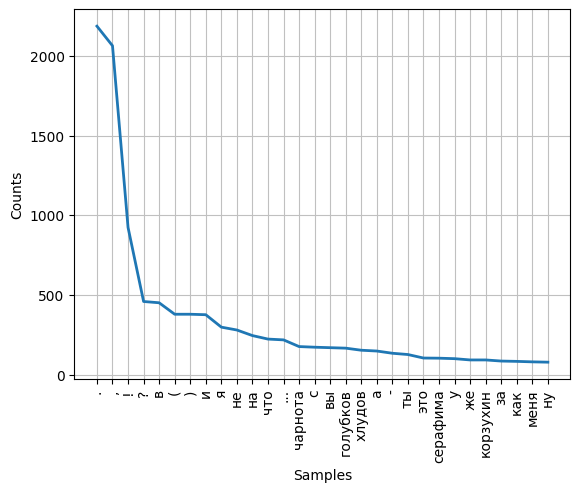

<Axes: xlabel='Samples', ylabel='Counts'>

In [41]:
fdist.plot(30,cumulative=False)

## Удаление стоп-слов

In [23]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'нею'])

In [24]:
print(len(russian_stopwords))
russian_stopwords

153


['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [25]:
%%time
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]

CPU times: user 158 ms, sys: 0 ns, total: 158 ms
Wall time: 165 ms


In [26]:
print(len(text_tokens))

72836


In [27]:
text = nltk.Text(text_tokens)

In [28]:
fdist_sw = FreqDist(text)
fdist_sw.most_common(10)

[('–', 3200),
 ('маргарита', 333),
 ('сказал', 232),
 ('ответил', 230),
 ('очень', 186),
 ('иван', 180),
 ('время', 168),
 ('коровьев', 162),
 ('глаза', 161),
 ('человек', 149)]

## Построение облака слов

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
text_raw = " ".join(text)

In [31]:
wordcloud = WordCloud(background_color='white').generate(text_raw)

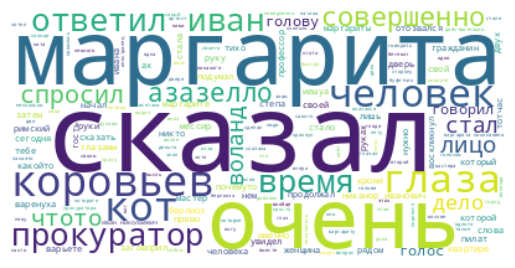

In [32]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Задание 5 баллов
1. выберите любое из произведений Булкагова (файлы доступны
на сайте) и очистите текст (1 балл)
f = open('/content/beg.txt', "r", encoding='Windows-1251')
2. постройте график частоты встречаемости слов (1 балл)
3. постройте график частоты встречамоесть слов в очищенном тексте (1 балл)
4. удалите стоп-слова и выведите самые встречаемые (1 балл)
5. постройте облако слов (1 балл)

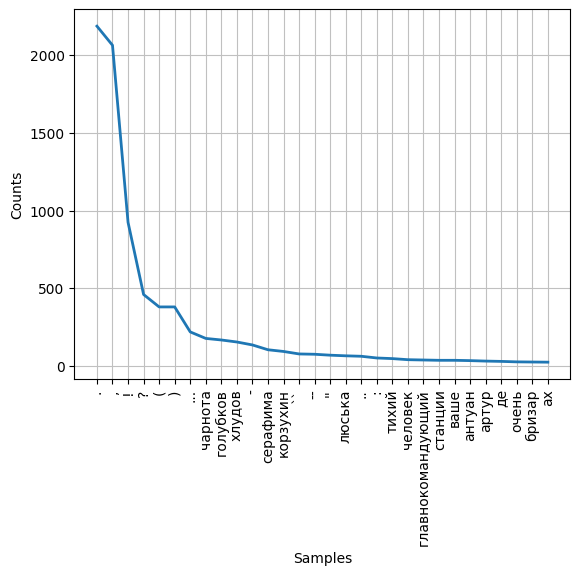

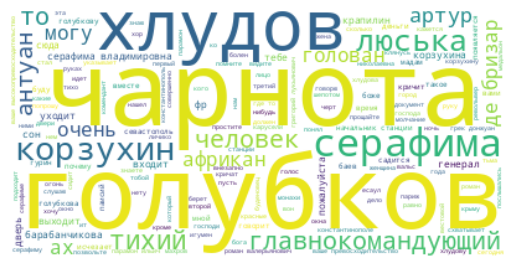

In [46]:
f = open('/content/beg.txt', "r", encoding='Windows-1251')
text = f.read()
text = text.lower()
text_tokens = word_tokenize(text)
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
text = nltk.Text(text_tokens)


fdist = FreqDist(text)
fdist.plot(30,cumulative=False)

text_raw = " ".join(text)
wordcloud = WordCloud(background_color='white').generate(text_raw)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()